# Semana 8 do Aceleradev DS Codenation

### Professor: Túlio Vieira de Souza | Tema: Modelagem e Regressão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset: House Pricing from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Vamos escolher as colunas com mais de 100% de completude

In [4]:
colunas_usaveis = df.isna().sum() / df.shape[0] == 0

Vamos obter as variáveis numéricas, mas somente as colunas

In [5]:
var_numericas = [i for i in df.loc[:, colunas_usaveis] if df[i].dtype != 'object']

Vamos encontrar as variáveis com maior correlação com nosso *target* `SalePrice`

In [6]:
y_treino = df['SalePrice']

In [7]:
x_treino = df[var_numericas].drop(columns='SalePrice')

In [8]:
from yellowbrick.target import FeatureCorrelation

/home/mikael/projetos_python/aceleradev/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/home/mikael/projetos_python/aceleradev/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


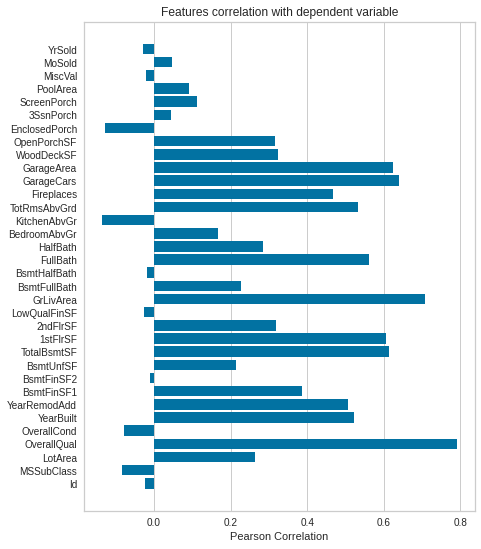

In [9]:
plt.figure(figsize=(7, 9))
correlaciona = FeatureCorrelation(labels=x_treino.columns)
correlaciona.fit(x_treino, y_treino)
correlaciona.show();

Descobrimos que as duas variáveis mais correlacionadas com `SalePrice` são: `OverallQual` e `GrLivArea`. Vamos olhar

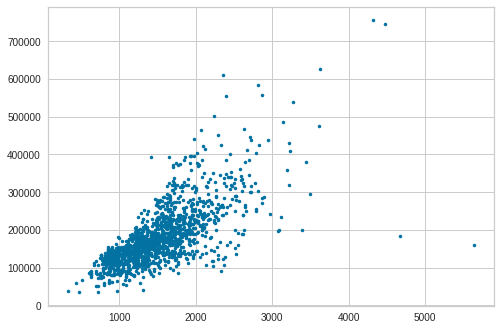

In [69]:
plt.plot(df['GrLivArea'], y_treino, '.')
plt.show()

Uma maneira arbitrária de tentar gerar uma função que descreva os dados, é fazer uma reta a olho. Eu sei que parece grotesco, mas o objetivo disso é entendermos que nós podemos **enviesar** um modelo, seja gerando uma curva "à olho", ou tentando modelar uma distribuição não linear com uma regressão linear

Diferente de um modelo de classificação, estamos interessados no **erro** do modelo de **regressão**. Ele é o nosso norte. Ele diz o quanto que o que previmos distoa do valor esperado. Para ilustrar isso, podemos fazer retas "na mão", e de alguma maneira, armazenar o resíduo dessa reta (mínimos quadrados)

In [83]:
ax = 334
bx = 5000
ay = 50000
by = 500000

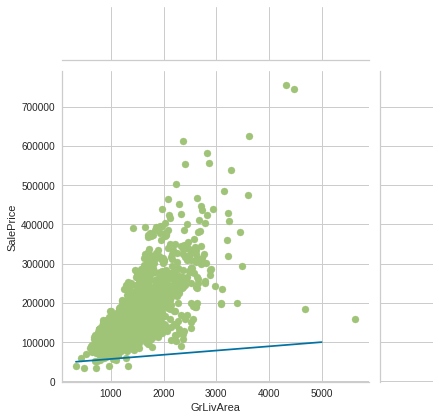

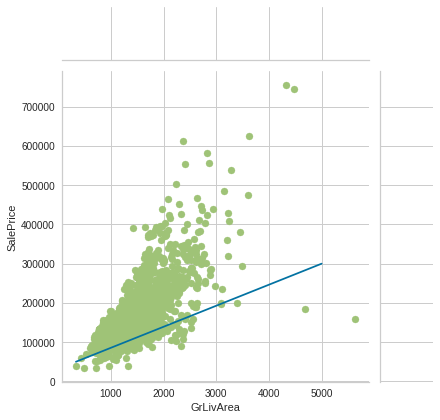

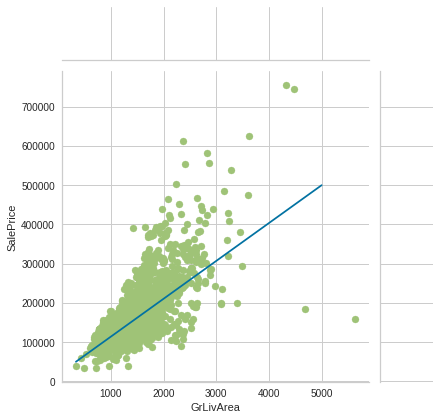

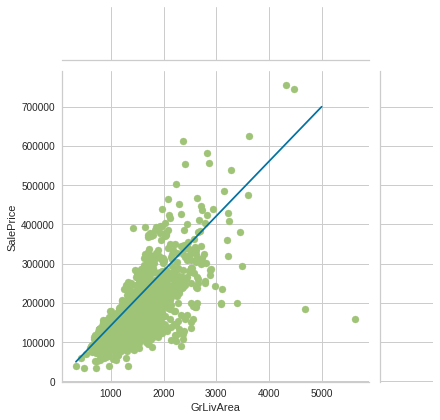

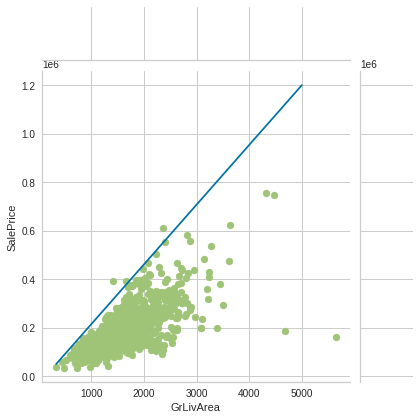

In [90]:
for i in [1.0E5, 3.0E5, 5.0E5, 7.0E5, 12.0E5]:
    grid = sns.JointGrid(df['GrLivArea'], y_treino)
    grid.plot_joint(plt.scatter, color='g')
    plt.plot([ax, bx], [ay, i])
    plt.show()

Imagine que cada reta dessa nós armazenamos os resíduos

In [88]:
residuos = [1.0E5, .6E5, .4E5, .8E5, 1.0E5]
passo = [1.0E5, 3.0E5, 5.0E5, 7.0E5, 12.0E5]

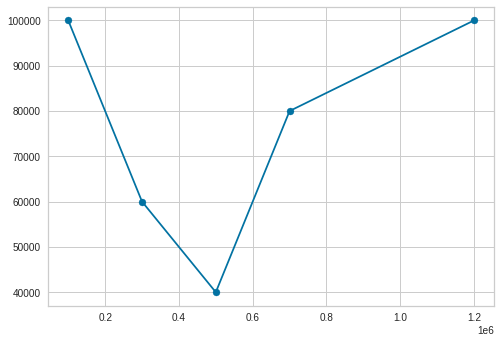

In [89]:
plt.plot(passo, residuos)
plt.scatter(passo, residuos)
plt.show()

Mesmo os dados sendo fictícios, podemos compreender o que acontece numa regressão linear. Cada reta vai apresentar um resíduo, esse é chamado **mínimos quadrados**, que nada mais é que a distância do ponto até a reta. A regressão tenta **minimizar** essa distância. Ou seja, é escolhida a reta que retorna a menor distância dos pontos à reta

Vamos obter uma reta através da regressão linear

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
regressor = LinearRegression()

In [40]:
regressor.fit(df[['GrLivArea', 'OverallQual']], y_treino)

LinearRegression()

In [41]:
x_teste = pd.read_csv('test.csv')
x_teste = x_teste[['GrLivArea', 'OverallQual']]
y_teste = pd.read_csv('sample_submission.csv')
y_teste = y_teste.loc[:, 'SalePrice']

In [42]:
y_pred = regressor.predict(x_teste)

In [43]:
mean_absolute_error(y_pred=y_pred, y_true=y_teste)

51373.9487581373

In [44]:
mean_squared_error(y_pred, y_teste)

4010310165.8616767

Podemos encontrar os coeficientes. E como nós usamos duas *features* para predizer o *target*, nós teremos uma equação de **combinação linear**

$$\text{SalePrice(GrLivArea, OverallQual)}=\alpha GrLivArea + \beta OverallQual + \theta$$

In [45]:
regressor.coef_

array([   55.86222591, 32849.04744063])

Podemos obter também o **coeficiente linear**

In [46]:
regressor.intercept_

-104092.66963598129

Falando do erro, do tamanho dele, como saber se ele está dentro do aceitável, ou se precisamos melhorar o modelo? Isso é feito logo no começo, quando as métricas do problema são estudadas. No caso da solução desse problema, que é tentar predizer o valor de uma casa, nós já devemos saber qual o erro aceitável **antes de fazer as predições**. Isso torna mais claro qual o objetivo do modelo